In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np

In [8]:
pip install matplotlib

  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
     ------------------------------------ 102.6/102.6 kB 423.8 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp37-cp37m-win_amd64.whl (54 kB)
     ---------------------------------------- 2.5/2.5 MB 9.0 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [11]:
#Reading csv file
df = pd.read_csv("admission_data.csv")

In [12]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
df["GRE Score"].isna().sum()

0

In [15]:
df["GRE Score"].mode()

0    312
dtype: int64

In [16]:
##If NA is present
# df["GRE Score"].fillna(df["GRE Score"].mode()[0], inplace=True)
# df["TOEFL Score"].fillna(df["TOEFL Score"].mode()[0], inplace= True)
# df["University Rating"].fillna(df["University Rating"].mean()[0], inplace=True)

In [17]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
##Creating X and Y datasets

x = df.drop(["Chance of Admit "], axis=1)
y = df["Chance of Admit "]

In [19]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [20]:
## Numerical columns
numerical_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']

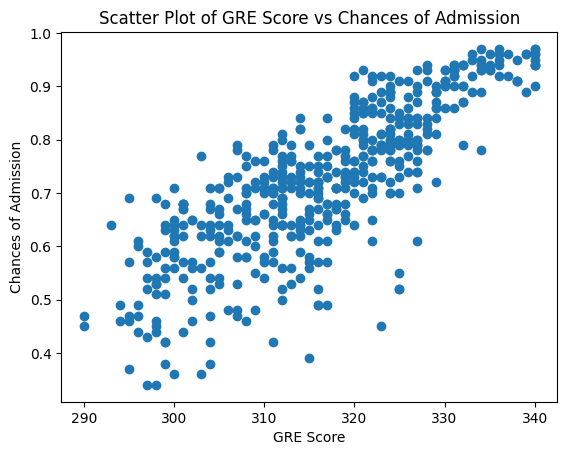

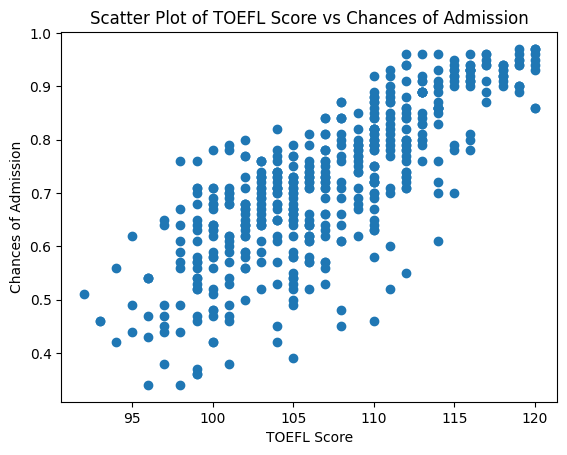

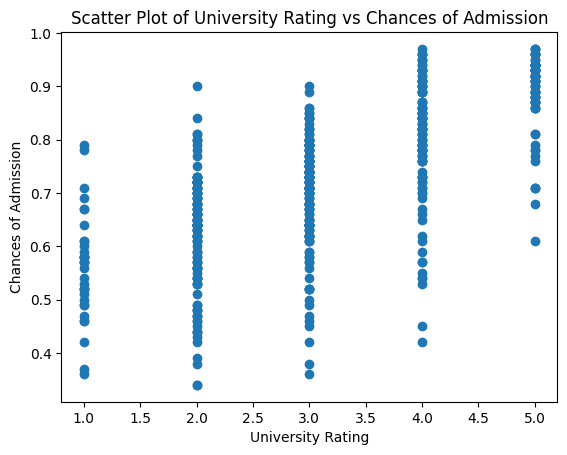

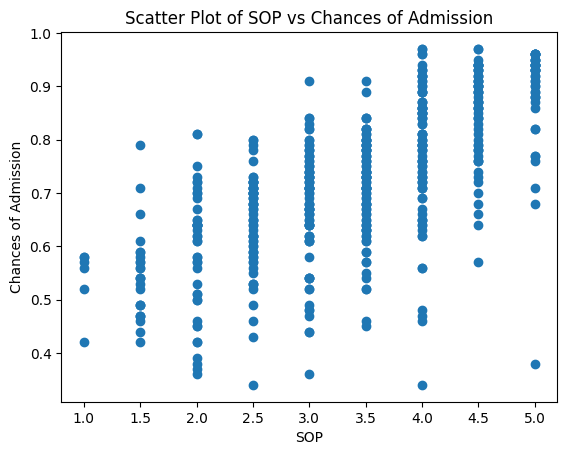

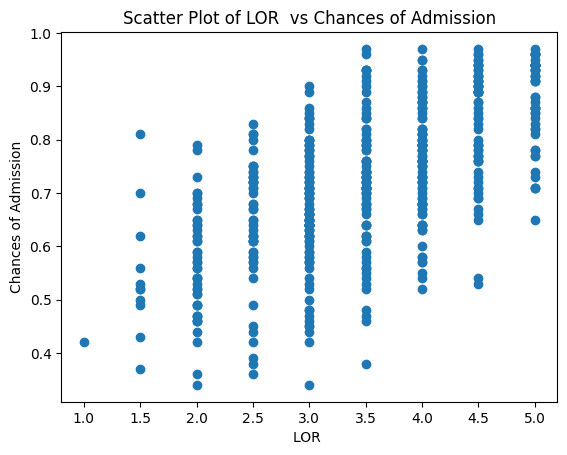

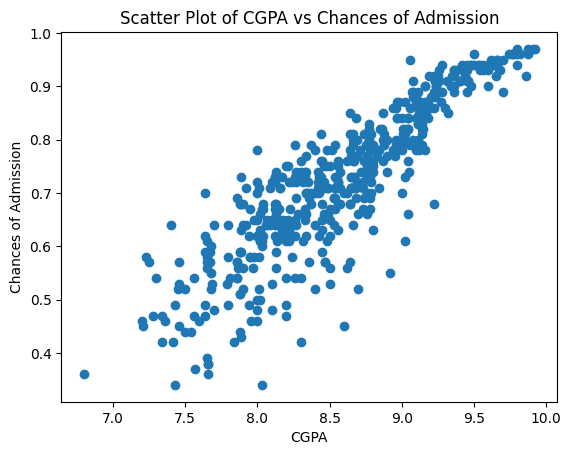

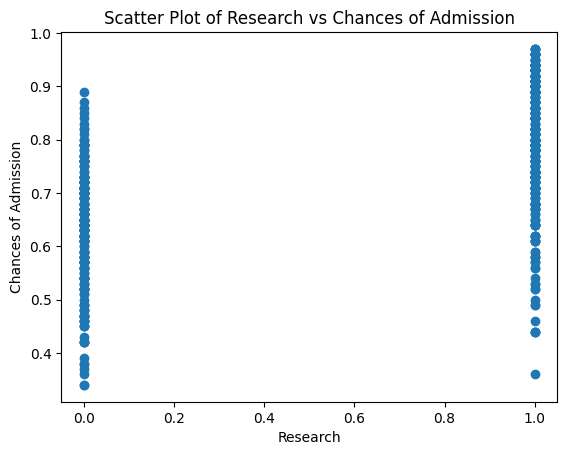

In [21]:
for i in numerical_columns:
  # if df[i].dtype == 'float64':
  plt.scatter(df[i], y)
  plt.title(f"Scatter Plot of {i} vs Chances of Admission")
  plt.xlabel(i)
  plt.ylabel("Chances of Admission")
  plt.show()


##Want to create multiple plots using for loop but getting one consolidated one


In [22]:
#From the above graphs between the continuous feature variables and the label column,
#it can be concluded that they exhibit a linear relationship amongst them. So, we’ll use
#Linear regression for prediction.

In [25]:
pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
##Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=100)

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [28]:
from sklearn.metrics import r2_score
score = r2_score(reg.predict(test_x), test_y)

In [29]:
score

0.8082585452743907

In [30]:
reg.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [31]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

param_grid = {
    'copy_X': [True,False],
    'fit_intercept': [True, False],
    'n_jobs': [10, 50, 100],
    'positive': [True, False]

}
#Best Params after Hyperparameter tuning
GS = GridSearchCV(estimator = reg,
                 param_grid = param_grid,
                 scoring = ["r2","neg_root_mean_squared_error","accuracy"],
                 refit = "r2",
                 cv = 5,
                 verbose = 4)

# Fit the GridSearchCV object to your data
GS.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=50, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 2/5] END copy_X=True, fit_intercept=False, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, n_jobs=50, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, n_jobs=50, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total tim

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 3/5] END copy_X=False, fit_intercept=True, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=False, fit_intercept=True, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=True, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=True, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=True, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=True, n_jobs=50, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total ti

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 5/5] END copy_X=False, fit_intercept=False, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=False, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=False, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=False, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=False, fit_intercept=False, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=False, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) 

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [10, 50, 100], 'positive': [True, False]},
             refit='r2',
             scoring=['r2', 'neg_root_mean_squared_error', 'accuracy'],
             verbose=4)

In [32]:
# Fit the GridSearchCV object to your data
GS.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=10, positive=False; accuracy: (test=nan) neg_root_

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=100, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=False, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 1/5] END copy_X=True, fit_intercept=False, n_jobs=100, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=False, n_jobs=100, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=False, n_jobs=100, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=False, n_jobs=100, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=False, n_jobs=100, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=True, n_jobs=10, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) t

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

[CV 3/5] END copy_X=False, fit_intercept=True, n_jobs=50, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 4/5] END copy_X=False, fit_intercept=True, n_jobs=50, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=True, n_jobs=50, positive=False; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=True, n_jobs=100, positive=True; accuracy: (test=nan) neg_root_mean_squared_error: (test=nan) r2: (test=nan) total

c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\metrics\_scorer.py", lin

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [10, 50, 100], 'positive': [True, False]},
             refit='r2',
             scoring=['r2', 'neg_root_mean_squared_error', 'accuracy'],
             verbose=4)

In [33]:
# Access the best parameters
best_params = GS.best_params_
print("Best params are:", best_params)

Best params are: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'positive': True}


In [34]:
score_GS = r2_score(GS.predict(test_x), test_y)
score_GS

0.8084157508174499

In [35]:
filename = 'finalized_model.pickle'
pickle.dump(GS, open(filename, 'wb'))

In [36]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.995695410103262


c:\Users\Tavleen Bajwa\Desktop\ML\Model_Deployment_To_Heroku\Admission_Prediction\Admission_Prediction_App\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
